In [177]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [202]:
Nsamples = 40000

def nSamples(second):
    '''
    return the number of samples corresponding to a given 
    duration in second.
    '''
    return int(second * Nsamples)


def nSecond(sample):
    '''
    return the time in second corresponding to a given sample
    '''
    return sample * Nsamples

In [255]:
def create_sound(freq, ampl, harmo=None, phases=None, envelop=None, Nharmo=10):
    '''
    Create a function s(t) modelling a sound, using the following function
    s(t) = envelop(t) * sum_i ( amps(i) * np.cos(2pi*freq*i*t - phases(i) )
    
    Parameters
    ----------
      - ampl   : amplitude of the signal (float)
      - freq   : frequency of the signal (float)
      - harmo  : relative amplitude of each harominc (function h(i))
      - phases : phases of each harmonics (function p(i))
      - envelop: sound envelop (callable env(t))
    
    Return
    ------
      - s: function taking a 1D numpy array
    ''' 
    
    # Envelopp
    if not envelop:
        envelop = lambda t: 1
    
    # Harmonic amplitudes
    if not harmo:
        harmo = lambda i: i
        
    # Harmonic phases
    if not phases:
        phases = lambda i: 0
    
    def sound(t):
        harmonics = [harmo(i)*np.cos(2*np.pi*(freq*i*t - phases(i))) for i in range(1, Nharmo+1)]
        harmonics = np.stack(harmonics, axis=1)
        return ampl * envelop(t) * harmonics.sum(axis=1)
    
    return sound

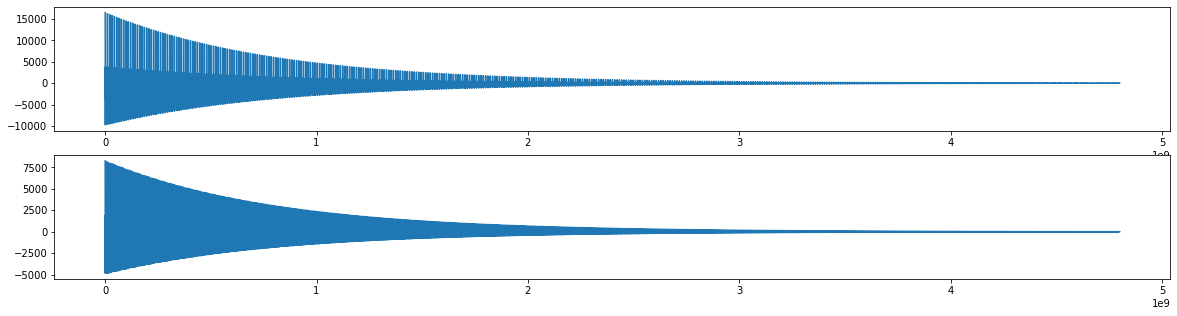

In [259]:
# Define two notes of a given instrument
env = lambda t: np.exp(-t/nSamples(0.5))
tNote = np.linspace(0, nSamples(3), nSamples(3))
n1 = create_sound(freq=440 ,ampl=300, envelop=env, Nharmo=10)
n2 = create_sound(freq=780 ,ampl=150, envelop=env, Nharmo=10)

# Plot the individual wave form
plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
plt.plot(nSecond(tNote), n1(tNote));
plt.subplot(2, 1, 2)
plt.plot(nSecond(tNote), n2(tNote));

In [260]:
# Simple addition
Audio(n1(tNote)+n2(tNote), rate=Nsamples)

In [261]:
# Play the note one after the other
music = np.zeros(shape=(nSamples(10)))

def add_note_to_music(note, time):
    '''Add the note `note` at a time `time`'''
    iStart = nSamples(time)
    iStop  = nSamples(time)+note.shape[0]
    if iStop>music.shape[0]:
        print('Music is not long enoug, note will not be added')
        return
    music[iStart:iStop] += note
    return


note1 = n1(tNote)
note2 = n2(tNote)

add_note_to_music(note1, 0)
add_note_to_music(note1, 0.25)
add_note_to_music(note2, 0.5)
add_note_to_music(note1, 1)
add_note_to_music(note2, 1.25)

Audio(music, rate=Nsamples)